## Part B: Newton Method Implementation

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sn
import matplotlib.pyplot as plt
import random
import os

In [3]:
def func(x1, x2):
    # Define the function
    ####### TODO ########
    res =2* x1 ** 2 + 2 * x2 ** 2 - 17 * x2 * np.cos(0.2 * np.pi * x1) - x1 * x2
    #####################
    return res

In [4]:
def hessian(x1, x2):
    # Calculate the hessian matrix
    # Use theoretically-derived formulas to implement this function
    ####### TODO ########
    res = np.array([[4 + 17 * ((0.2 * np.pi) ** 2) * x2 * np.cos(0.2 * np.pi * x1), 17 * (0.2 * np.pi) * np.sin(0.2 * np.pi * x1) - 1] 
                    ,[17 * (0.2 * np.pi) * np.sin(0.2 * np.pi * x1) - 1, 4]])
    #####################
    return res

In [5]:
# Define function inputs
def hessianInv(m):
    # Calculate the determinant and inverse of the hessian matrix
    ####### TODO ########
    inv = None
    if np.linalg.det(m) != 0:
      inv = np.linalg.inv(m)
    #####################
    return inv

In [6]:
def gradient(x1, x2):
    # Calculate the gradient vector
    # Use theoretically-derived formulas to implement this function
    ####### TODO ########
    res = np.array([4 * x1 + 17 * x2 * (0.2 * np.pi) * np.sin(0.2 * np.pi * x1) - x2,
                    4 * x2 - 17 * np.cos(0.2 * np.pi * x1) - x1])
    #####################
    return res

In [7]:
def newtonMethod(x1, x2, epochs):
    for i in range(epochs):
        # Perform one step of the newton method
        # Use previous functions to implement this part
        # Update values of x1 and x2
        ####### TODO ########
        alpha = 0.1
        x = np.array([x1, x2]) - alpha * hessianInv(hessian(x1, x2)) @ gradient(x1, x2)
        x1 = x[0]
        x2 = x[1]
        #####################
    return x1, x2

Now we shall go on to finding the minimum value

In [8]:
x1 = 1
x2 = 3
epochs = 100
x1, x2 = newtonMethod(x1, x2, epochs)
minVal = func(x1, x2)
print(f"x1 is: {x1} and x2 is: {x2} (after {epochs} epochs)")
print(f"The Minimum Value for the function is: {minVal} (after {epochs} epochs)")

x1 is: 0.13088982776506944 and x2 is: 4.268341781220409 (after 100 epochs)
The Minimum Value for the function is: -36.403497737572785 (after 100 epochs)


* desired output is (approximately):
* x1 is: 0.13 and x2 is: 4.27 (after 100 epochs)
* The Minimum Value for the function is: -36.40 (after 100 epochs)

Now we go on to plot the wanted shape

In [9]:
####### TODO #########
stepSize = 0.5
range_x1 = np.arange(-5, 5, stepSize)
range_x2 = np.arange(0, 10, stepSize)

In [10]:
points = []
# We want to classify the points into three categories:
# Close = -1, Far = 0, Further = 1
categories = []
for x1 in range_x1:
    for x2 in range_x2:
        # Use Newton method and find the distance as stated in the question
        ######## TODO ##########
        x1_new , x2_new = newtonMethod(x1, x2, 10)
        distance = np.abs(func(x1_new, x2_new) - 36.4)
        ########################
        if distance < 15:
            categories.append(-1)
        elif distance < 150:
            categories.append(0)
        else:
            categories.append(1)
        points.append([x1, x2])

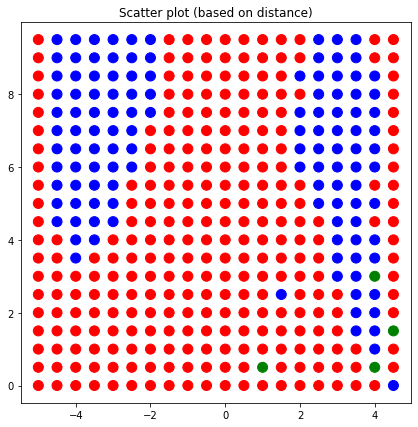

In [11]:
plt.figure(figsize=(7,7))
plt.title('Scatter plot (based on distance)')
########## TODO ###########
x = [x[0] for x in points]
y = [x[1] for x in points]
colormap = np.array(['r', 'g', 'b'])
plt.scatter(x, y, s=100, c=colormap[categories])
###########################
plt.show()